In [1]:
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR, LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc, recall_score
import numpy as mp
import matplotlib.lines as mlines
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [13]:
#метод опорных векторов
X, y = make_classification(n_samples = 100000, n_features = 20, n_informative = 10, n_redundant = 10, random_state = 42);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42);

In [14]:
SVR = LinearSVR(C = 0.01);
SVR.fit(X_train, y_train);

In [16]:
prc = precision_recall_curve(y_test, SVR.predict(X_test));
roc = roc_curve(y_test, SVR.predict(X_test));

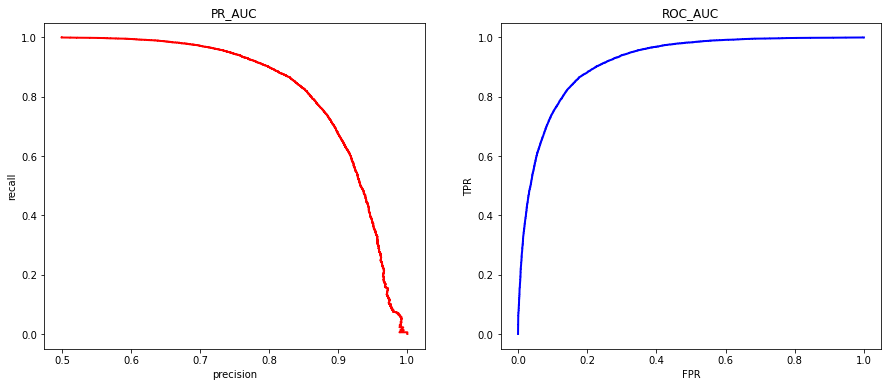

PR -  0.908319398616898 
 ROC -  0.9182982267672866


In [10]:
fig = plt.figure(figsize = (15, 6));
ax_1 = fig.add_subplot(1, 2, 1);
ax_1.plot(prc[0], prc[1], color = 'red', linewidth = 2);
ax_1.set(xlabel = 'precision', ylabel = 'recall', title = 'PR_AUC');
ax_2 = fig.add_subplot(1, 2, 2);
ax_2.plot(roc[0], roc[1], color = 'blue', linewidth = 2);
ax_2.set(xlabel = 'FPR', ylabel = 'TPR', title = 'ROC_AUC');
plt.show()
print('PR - ', auc(prc[1], prc[0]), '\n', 'ROC - ', auc(roc[0], roc[1]))

In [4]:
X, y = make_classification(n_samples = 10000, n_features = 2, n_informative = 2, n_redundant = 0, weights = [1, 200], class_sep = 4,  random_state = 42);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [562]:
def newline(p1, p2, c, tit):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = c, linewidth = 2, label = tit)
    ax.add_line(l)
    return l
#newline([0, -w_0/w_2], [-w_0/w_1, 0])

In [530]:
def plus_zero(a):
    attribute = np.zeros(shape = (a.shape[0], a.shape[1] + 1));
    attribute[:, :-1] = a;
    attribute[:, -1] = int(1);
    return attribute

class vector(object):
    
    __class__ = "CustomSVM"
    __doc__ = """
    This is an implementation of the SVM classification algorithm
    Note that it works only for binary classification

    #############################################################
    ######################   PARAMETERS    ######################
    #############################################################

    etha: float(default - 0.01)
        Learning rate, gradient step

    alpha: float, (default - 0.1)
        Regularization parameter in 0.5*alpha*||w||^2

    epochs: int, (default - 200)
        Number of epochs of training

    #############################################################
    #############################################################
    #############################################################
    """
    
    def __init__(self, itteration = 20, alpha = 0.2, etha = 0.01):
        self.itteration = itteration;
        self.alpha = alpha;
        self.etha = etha;
        self.w_ = None;
        self.train_error = None;
        self.train_loss = None;
    def penalty(self, X_train, y_train):
        return max(0, 1 - y_train*np.dot(self.w_, X_train));
    
    def q_loss(self, X_train, y_train):
        return self.penalty(X_train, y_train) + self.alpha*np.dot(self.w_, self.w_);
    
    def fit(self, X_train, y_train):
        X_train = plus_zero(X_train);
        self.w_ = np.random.normal(0, 0.05, size = (X_train.shape[1]));
        self.train_error = [];
        self.train_loss = [];
        if len(np.unique(y_train)) % 2 == 0:
            for itter in range(self.itteration):
                tra_err = 0;
                train_loss = 0;
                for i in range(X_train.shape[0]):
                    margin = y_train[i] * X_train[i].dot(self.w_)
                    if margin >= 1: 
                        self.w_ -= (self.etha*self.alpha*self.w_/self.itteration);
                        train_loss += self.q_loss(X_train[i], y_train[i]);
                    else:
                        self.w_ -= self.etha*(self.alpha*self.w_/self.itteration - y_train[i] * X_train[i]);
                        tra_err += 1;
                        train_loss += self.q_loss(X_train[i], y_train[i]); 
                self.train_error.append(tra_err);
                self.train_loss.append(train_loss);
            self.train_error = np.array(self.train_error);
            self.train_loss = np.array(self.train_loss);       
    def predict(self, X):
        y_predict = [];
        X = plus_zero(X);
        for i in range(X.shape[0]):
            y_pedict.append(np.sigh(X[i].dot(self.w_)));
        return np.array(y_predict)

In [506]:
svm = vector(itteration = 150, alpha = 0.001, etha = 0.5);
svm.fit(X_train, y_train)

array([-1.26498756,  0.40681938,  0.85737191])

In [507]:
print(w_1, w_2, w_0)
print(svm.w_)

0.38029425513151116 0.47315287786698423 [0.98498006]
[-1.26498756  0.40681938  0.85737191]


In [513]:
iris = load_iris()
X = iris.data
Y = iris.target

pca = PCA(n_components=2)
X = pca.fit_transform(X)
Y = (Y > 0).astype(int)*2-1 
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, Y, test_size=0.4, random_state=2020)
svm.fit(X_train_iris, y_train_iris)

array([ 1.07135999, -1.41877517,  0.90460769])

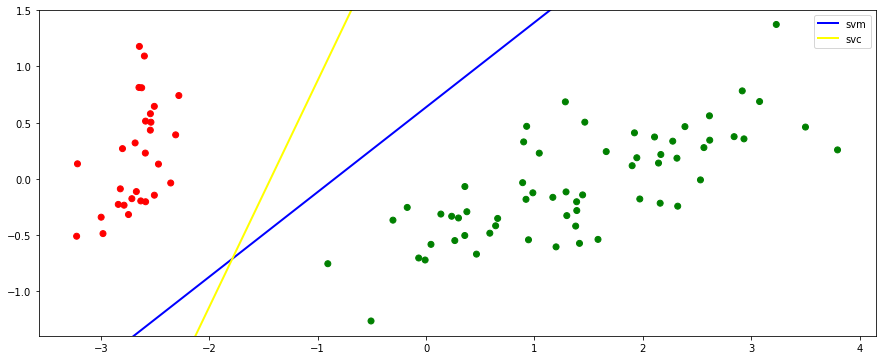

In [567]:
plt.figure(figsize = (15, 6))
d = {1: 'green', -1: 'red'}
plt.scatter(X_train_iris[:,0], X_train_iris[:,1], c=[d[y] for y in y_train_iris]);
newline([0, -svm.w_[2]/svm.w_[1]], [-svm.w_[2]/svm.w_[0], 0], 'blue', 'svm');
svc.fit(X_train_iris, y_train_iris)
w_1 = svc.coef_[0][0];
w_2 = svc.coef_[0][1];
w_0 = svc.intercept_;
newline([0, -w_0/w_2], [-w_0/w_1, 0], 'yellow', 'svc');
plt.legend()
plt.show()

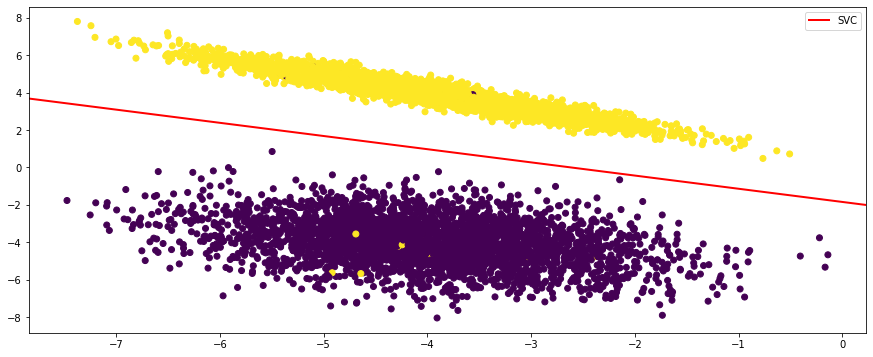

In [579]:
plt.figure(figsize = (15, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train);
svc = SVC(kernel = 'linear', C = 0.01);
svc.fit(X_train, y_train)
w_1_svc = svc.coef_[0][0];
w_2_svc = svc.coef_[0][1];
w_0_svc = svc.intercept_;
newline([0, -w_0_svc/w_2_svc], [-w_0_svc/w_1_svc, 0], 'red', 'SVC');
plt.legend();
plt.show()

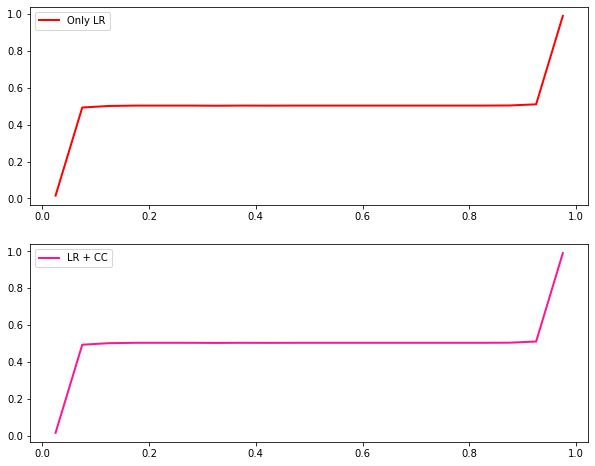

In [241]:
#задание 2
lr = LogisticRegression(C = 0.01);
lr.fit(X_train, y_train);
predict_lr = lr.predict_proba(X_test)[:, 1];
def plot_calibration_curve_lr(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1);
        middle = (r - l) / 2 + 1 * i / n_bins
        bin_middle_points.append(middle);
        bin_real_ratios.append(np.sum(y_test == ((preds >= l) & (preds < r).astype('int')))/3000)
    return((bin_middle_points, bin_real_ratios));
cc_lr = CalibratedClassifierCV(lr, cv = 5);
cc_lr.fit(X_train, y_train);
predict_cc_lr = cc_lr.predict_proba(X_test)[:, 1];
fig = plt.figure(figsize = (10, 8));
ax_1 = fig.add_subplot(2, 1, 1);
lr_plot = plot_calibration_curve_lr(y_test, predict_cc_lr);
ax_1.plot(lr_plot[0], lr_plot[1], 'red', Linewidth = 2.0, label = 'Only LR');
plt.legend();
ax_2 = fig.add_subplot(2, 1, 2);
cc_lr_plot = plot_calibration_curve_svc(y_test, predict_cc_lr);
ax_2.plot(cc_lr_plot[0], cc_lr_plot[1], 'deeppink', Linewidth = 2.0, label = 'LR + CC');
plt.legend();
plt.show();

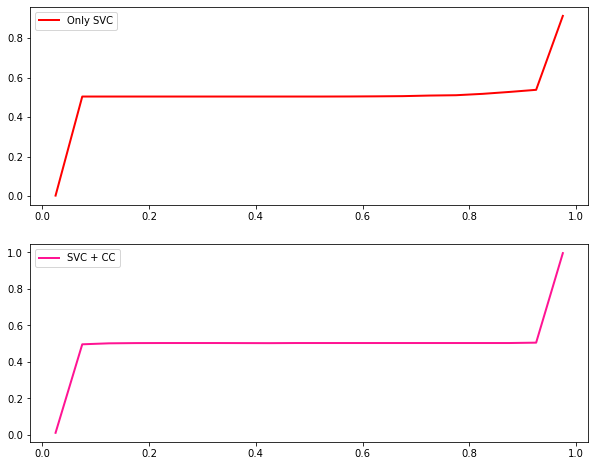

In [259]:
svc = LinearSVC(C = 0.01);#метод опорных векторов
svc.fit(X_train, y_train);
predict_svc = svc.decision_function(X_test);
def plot_calibration_curve_svc(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i;
        r = 1.0 / n_bins * (i + 1);
        middle = (r - l) / 2 + 1 * i / n_bins;
        if (i > 0) & (i < 19):
            bin_middle_points.append(middle);
            bin_real_ratios.append(np.sum(y_test == ((preds >= l) & (preds < r).astype('int')))/3000);
        if i == 0: 
            bin_middle_points.append(middle); 
            bin_real_ratios.append(np.sum(y_test == ((preds < r).astype('int')))/3000);
        if i > 18:
            bin_middle_points.append(middle);
            bin_real_ratios.append(np.sum(y_test == ((preds >= l).astype('int')))/3000);
    return((bin_middle_points, bin_real_ratios));
cc_svc = CalibratedClassifierCV(svc, cv = 5);
cc_svc.fit(X_train, y_train);
predict_cc_svc = cc_svc.predict_proba(X_test)[:, 1];
fig = plt.figure(figsize = (10, 8));
ax_1 = fig.add_subplot(2, 1, 1);
svc_plot = plot_calibration_curve_svc(y_test, predict_svc);
ax_1.plot(svc_plot[0], svc_plot[1], 'red', Linewidth = 2.0, label = 'Only SVC');
plt.legend();
ax_2 = fig.add_subplot(2, 1, 2);
cc_svc_plot = plot_calibration_curve_svc(y_test, predict_cc_svc);
ax_2.plot(cc_svc_plot[0], cc_svc_plot[1], 'deeppink', Linewidth = 2.0, label = 'SVC + CC');
plt.legend();
plt.show();

In [5]:
#часть 2
data = pd.read_csv('train.csv', index_col = 0);
target = data.target.values;
data = data.drop('target', axis = 1);

In [3]:
np.random.seed(42)
mask_plus = np.random.choice(np.where(target == 1)[0], 21000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 21000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [12]:
#обычная регрессия
lr = LogisticRegression(C = 0.01);
lr.fit(X_train, y_train);
print(auc(roc_curve(y_test, lr.predict_proba(X_test)[:, 1])[0], roc_curve(y_test, lr.predict_proba(X_test)[:, 1])[1]))

0.6196117568122659


c:\users\владимир\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
#с OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore');
enc.fit(X_train);
X_train1, X_test1 = enc.transform(X_train), enc.transform(X_test);

In [14]:
%%time
lr.fit(X_train1, y_train);
print(auc(roc_curve(y_test, lr.predict_proba(X_test1)[:, 1])[0], roc_curve(y_test, lr.predict_proba(X_test1)[:, 1])[1]))

0.6336944247550875
Wall time: 966 ms


c:\users\владимир\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#men_target Encoding 
def mean_target(X, target):
    X_new = X.copy();
    for i in X.columns:
        for j in np.unique(X[i].values):
            location = np.where(X[i] == j);
            data_new = np.sum(target[location])/location[0].shape[0]
            X_new[i].iloc[location] = data_new;
    return X_new
data_mean = mean_target(data, target);
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(data_mean, target, test_size = 0.5);

c:\users\владимир\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
lr.fit(X_train_mean, y_train_mean);
print(auc(roc_curve(y_test_mean, lr.predict_proba(X_test_mean)[:, 1])[0], roc_curve(y_test_mean, lr.predict_proba(X_test_mean)[:, 1])[1]))

0.9395057927851884


In [17]:
#men_target Encoding + noise
#понижение риска переобучения при добавлении шума
def mean_target_noise(X, target):
    X_new = X.copy();
    for i in X.columns:
        for j in np.unique(X[i].values):
            location = np.where(X[i] == j);
            data_new = np.sum(target[location])/location[0].shape[0] + np.random.normal(0, 0.5, size = 1);
            X_new[i].iloc[location] = data_new;
    return X_new
data_mean = mean_target_noise(data, target);
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(data_mean, target, test_size = 0.5);

c:\users\владимир\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
lr.fit(X_train_noise, y_train_noise);
print(auc(roc_curve(y_test_noise, lr.predict_proba(X_test_noise)[:, 1])[0], roc_curve(y_test_noise, lr.predict_proba(X_test_noise)[:, 1])[1]))

0.7846907511875172


In [151]:
#бонусная часть(реализация фолдов)
def fold(X, target, n):
    X_new = X.copy()
    folds = np.linspace(0, X.shape[0], n, dtype = 'int');
    fold_end = np.arange(0, X.shape[0]);
    all_new = [];
    for y in range(len(folds)-1):
        fold_train = np.arange(folds[y], folds[y+1])
        X_new_train = X_new.iloc[fold_train];
        target_train = target[fold_train];
        folds_numb = np.delete(fold_end, fold_train)
        X_new_numb = X_new.iloc[folds_numb];
        target_numb = target[folds_numb];
        for i in X_new.columns:
            for j in np.unique(X_new_numb[i].values):
                location_numb = np.where(X_new_numb[i] == j);
                data_new = np.sum(target_numb[location_numb])/location_numb[0].shape[0]# +  np.random.normal(0, 0.5, size = 1) - шум;
                location_train = np.where(X_new_train[i] == j);
                X_new_train[i].iloc[location_train] = data_new;
        all_new.append(X_new_train)  
    return all_new

In [152]:
X_fold = fold(data, target, 6);

<ipython-input-151-c677db846585>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new_train[i].iloc[location_train] = data_new;


In [164]:
#сглаживание
def mean_smooth(X, target, C):#C определяет степень сглаживания
    X_new = X.copy();
    prior = np.mean(target);
    for i in X.columns:
        for j in np.unique(X[i].values):
            location = np.where(X[i] == j);
            data_new = (np.sum(target[location]) + C * prior) / (location[0].shape[0] + C);
            X_new[i].iloc[location] = data_new;
    return X_new
data_smooth = mean_smooth(data, target, 10);
X_train_smooth, X_test_smooth, y_train_smooth, y_test_smooth = train_test_split(data_mean, target, test_size = 0.5);

c:\users\владимир\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [165]:
lr.fit(X_train_smooth, y_train_smooth);
print(auc(roc_curve(y_test_smooth, lr.predict_proba(X_test_smooth)[:, 1])[0], roc_curve(y_test_smooth, lr.predict_proba(X_test_smooth)[:, 1])[1]))

0.7811310974672564


In [4]:
#отбор признаков
enc = OneHotEncoder(handle_unknown = 'error', drop = 'first');
data = enc.fit_transform(data);
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42);
print(X_train.shape[1], X_test.shape[1])

23108 23108


In [7]:
%%time
lr = LogisticRegression(C = 0.1);
lr.fit(X_train, y_train);
score_one = auc(roc_curve(y_test, lr.predict_proba(X_test)[:, 1])[0], roc_curve(y_test, lr.predict_proba(X_test)[:, 1])[1]);
print(score_one)

0.6618437024832977
Wall time: 1.24 s


c:\users\владимир\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
class feature():
    def __init__(self, features, n_feat):
        self.features = features;
        self.n_feat = n_feat;
    def normalize_feature(self):
        features = MinMaxScaler().fit_transform(self.features.reshape(-1, 1));
        sort_feat = np.argsort(features.reshape(-1, ));
        return sort_feat[-self.n_feat:].reshape(-1,)
    def select_feature(self):
        features = np.abs(self.features);
        sort_feat = np.argsort(features);
        return sort_feat[:, -self.n_feat:].reshape(-1,)
select = feature(lr.coef_, 200);

In [9]:
%%time
#без нормализации, 200 признаков
no_norm = select.select_feature()
lr = LogisticRegression(C = 0.1);
lr.fit(X_train[:, no_norm], y_train);
score_two = auc(roc_curve(y_test, lr.predict_proba(X_test[:, no_norm])[:, 1])[0], roc_curve(y_test, lr.predict_proba(X_test[:, no_norm])[:, 1])[1]);
print(score_two)

0.5923113439492526
Wall time: 275 ms


In [10]:
%%time
#с нормализацией 200 признаков
with_norm = select.normalize_feature();
lr = LogisticRegression(C = 0.1);
lr.fit(X_train[:, with_norm], y_train);
score_three = auc(roc_curve(y_test, lr.predict_proba(X_test[:, with_norm])[:, 1])[0], roc_curve(y_test, lr.predict_proba(X_test[:, with_norm])[:, 1])[1]);
print(score_three)

0.575018808222136
Wall time: 224 ms


In [444]:
#метод фильтрации
def t_stat(X, y, n):
    loc_zero = np.where(y == 0);
    loc_one = np.where(y == 1);
    t = [];
    for i in range(X.shape[1]):
        t.append((X[loc_one, i].mean() - X[loc_zero, i].mean())/ np.sqrt((len(loc_one[0])*X[loc_one, i].toarray().std()
                                                                        + len(loc_zero[0])*X[loc_zero, i].toarray().std())/
                                                                        (len(loc_one[0])+len(loc_zero[0])))); 
    return t
def t_dis(X, y):
    loc_zero = np.where(y == 0);
    loc_one = np.where(y == 1);
    t = [];
    for i in range(X.shape[1]):
        t.append((X[loc_one, i].mean() - X[loc_zero, i].mean())/ np.sqrt((len(loc_one[0])*np.power(X[loc_one, i].toarray().std(), 2)
                                                                        + len(loc_zero[0])*np.power(X[loc_zero, i].toarray().std(), 2))/
                                                                        (len(loc_one[0])+len(loc_zero[0])))); 
    return t

In [451]:
lr = LogisticRegression(C = 0.1);
lr.fit(X_train[:, feat_t], y_train);
score_four = auc(roc_curve(y_test, lr.predict_proba(X_test[:, feat_t])[:, 1])[0], roc_curve(y_test, lr.predict_proba(X_test[:, feat_t])[:, 1])[1]);
print(score_four)

0.5
